## Cassagrain telescope
The system consists of a source, parabolic primary mirror with central hole, hyperbolic secondary mirror and a detector at Cassagrain  focus. As the mirror parameters are not optimized, spot diagram shows not-to-a-point convergence. The Mueller matrix for the on-axis field is identity as the system is axially symmetric.  

In [1]:
# %matplotlib inline
# %matplotlib tk
# %matplotlib qt5
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
from PyAstroPol import *
roundOffDisplay(5)

In [2]:
S = Source(10000, Clear=180)                                    # Source for ray analysis
Sd = Source(20, Clear=180)                                      # Source for ray display
#
M1 = Surface(200, R=-2000, K=-1.0, 
             Mirror=True, n2=1.1+6.8j, iDia=40)                 # Primary mirror with hole
M1.translateOrigin(z=1000)
#
M2 = Surface(100, R=-500, K=-1.01,
             Mirror=True, n2=1.1+6.8j)                          # Secondary mirror with hole
M2.translateOrigin(z=200)
#
D = Detector(10)                                                # Detector
D.translateOrigin(z=1200)                                       # Adjust the position

In [3]:
Sys = System(S, [M1, M2], D, dRays=Sd)                          # Complete optical system
Sys.propagateRays()

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: invalid value encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np.sin(self.iTheta)
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  V = V/np.reshape(np.linalg.norm(V, axis=1), newshape=(Vs[0],1))


C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: invalid value encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np.sin(self.iTheta)
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  V = V/np.reshape(np.linalg.norm(V, axis=1), newshape=(Vs[0],1))


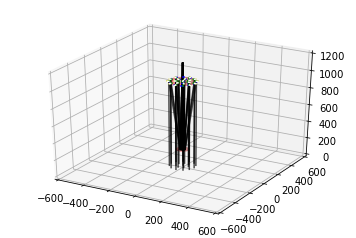

In [4]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                    # Draw optical system
Sys.Components[0].drawPolarizationDirection(Ax, 10)
adjustAspect(Ax, 1200, z=600)                                   # Adjust 3D space
plt.show()

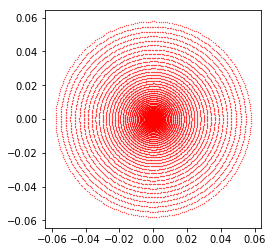

In [5]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                   # Draw spot diagram
plt.show()

In [6]:
MM, Tra = Sys.getSystemMuellerMatrix()                          # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)

System Mueller matrix is : 
 [[ 1.00000  0.00000  0.00000  0.00000]
 [ 0.00000  1.00000  0.00000  0.00000]
 [ 0.00000  0.00000  1.00000 -0.00000]
 [ 0.00000 -0.00000 -0.00000  1.00000]]
Throughput is:  0.7545698896027908


C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: invalid value encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np.sin(self.iTheta)
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  V = V/np.reshape(np.linalg.norm(V, axis=1), newshape=(Vs[0],1))
